<a href="https://colab.research.google.com/github/amanpatelll/MACHINE_LEARNING_PROJ-S/blob/LINEAR-REGRESSION/Gold_Price_Prediction_lin_regression_aman_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AMAN PATEL

Importing libraries and packages -
Using the necessary and the usual packages as shown below - ( randomforestregressor may be new )

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


Creating a dataframe using pandas and printing the first 5 rows of the data -

In [129]:
df=pd.read_csv('/content/gld_price_data.csv')
# printing the first 5 rows of dataframe
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


The predicted values will be the GLD column ( Y ) and the remaining dataframe will be the X array -

In [130]:
# printing the last 5 rows of the df -
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [131]:
# shape of data -
df.shape
# the below dimensions gives us that there are 6 features and 2290 examples

(2290, 6)

In [132]:
df.info()
# this gives us the information of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [133]:
# code for number of missing values
df.isnull().sum()
df=df.drop('Date',axis=1)
# the output below shows that there are no missing values in the dataset

In [134]:
df.describe()
# gives us a lot of statistical data categorically

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Finding Correlation between the various columns in a df -

types of correlation -
1. Positive correlation ( directly proportional )
2. Negative correlation ( inversely proprotional )

In [135]:
correlation = df.corr()
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


Constructing a figure to understand the correlation in this dataset

<Axes: >

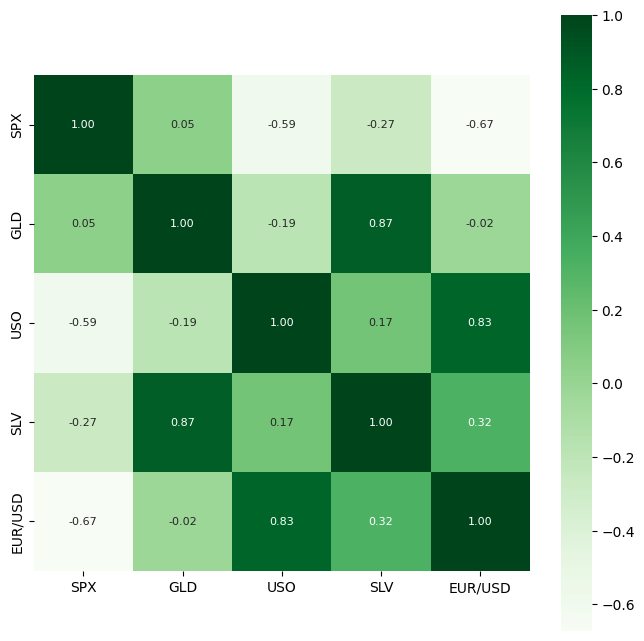

In [136]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True , annot_kws={'size':8},cmap='Greens')
# try changing color by adding different colorswith 's' in the end of it
# FUN
# it makes sense that correlation of a feature with itself is 1 .
# 'fmt' decides upto which decimal point will the correaltion be seen .
# 'annot_kws' decides the size of the annotation o.e the values


One can print the indivisual values of the correlation of a specific column with other columns as shown below -

In [137]:
# printing correlation values of SLV with other columns
print(correlation['SLV'])

SPX       -0.274055
GLD        0.866632
USO        0.167547
SLV        1.000000
EUR/USD    0.321631
Name: SLV, dtype: float64


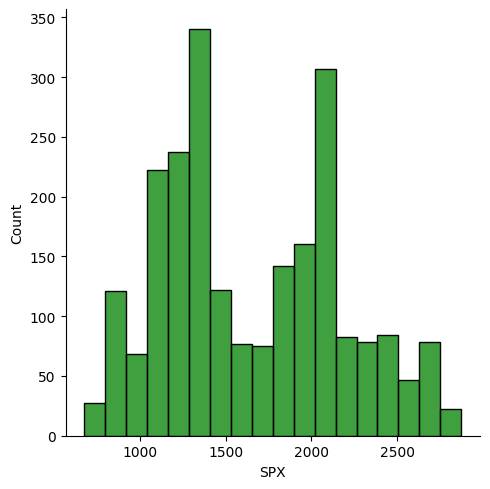

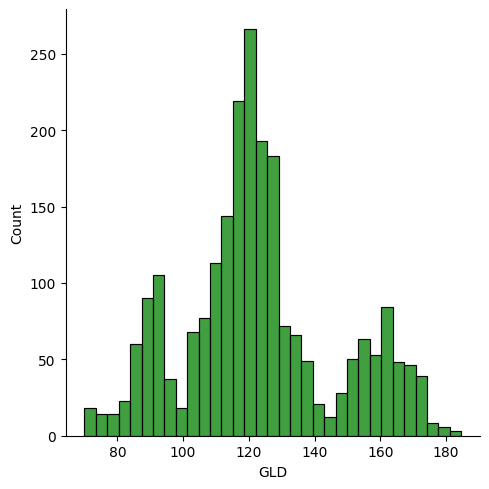

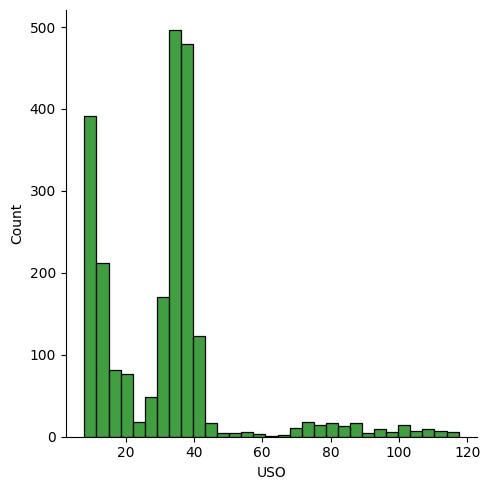

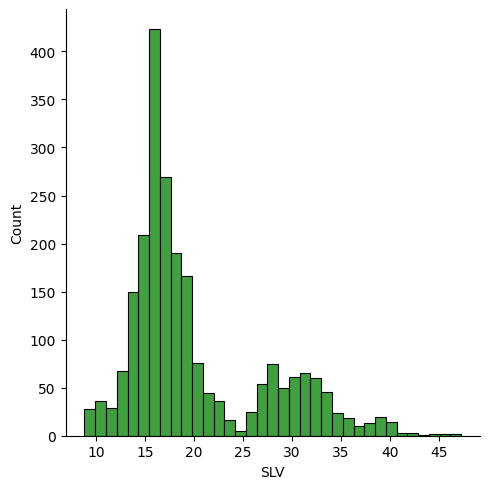

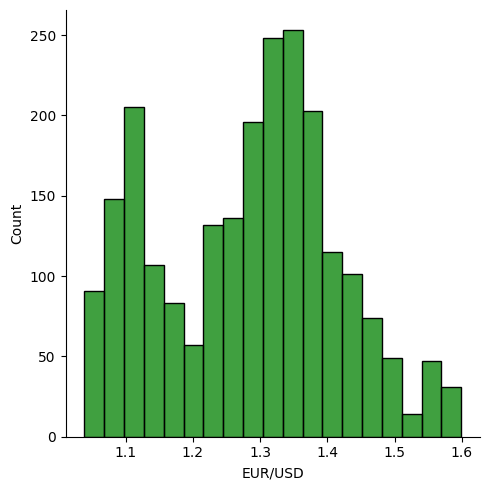

In [138]:
# plotting the values of every indivisual columns using a for loop -
for i in df.columns:
  sns.displot(df[i],color="green")

<ipython-input-139-1e7e54ba53af>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color="green")


<Axes: xlabel='GLD', ylabel='Density'>

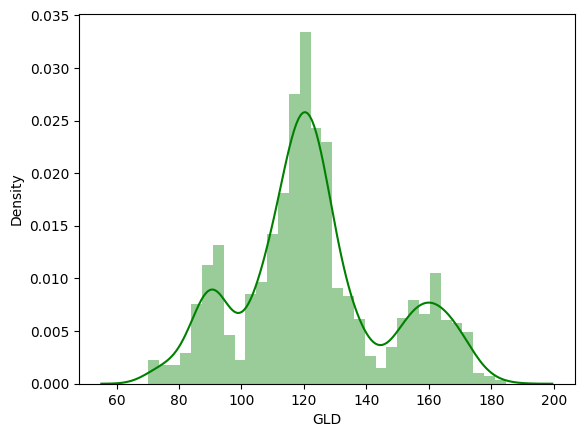

In [139]:
# 'distplot' is going to be removed from the seaborn package in version 1.2 so as of now it can plot only a single grapg at a time
sns.distplot(df['GLD'],color="green")

THIS WAS THE ASSESSING AND KNOWING THE DATA .

NOW , WE WILL START SPLITTING THE DATA , WHICH IS THE FIRST STEP IN LINEAR REGRESSION .

In [140]:
# splitting into features and the target arrays i.e X and Y
X=df.drop(['GLD'],axis=1)
Y=df['GLD']
print(X)
print(Y)
# we've created our 2 datasets

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


The next step will be to split the X and Y into testing and training data .
This will be done by using the train_test_split module that was imported at the start .

In [141]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.01,random_state=2)


Model Training -
Random Forest Regressor ( this includes multiple decision trees )

You can use Linear Regression module also from sklearn package
 - that is used in car_price_prediction project


In [142]:
regressor = RandomForestRegressor(n_estimators=100)

In [143]:
# training the model using the train sets
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation -


In [144]:
# prediction -
train_data_prediction = regressor.predict(X_train)
# predicted values of GLD using the X_train set is as shown as below -
print(train_data_prediction)

[157.1403025  125.25139922  93.92820128 ... 130.4227969  159.91819593
 114.69629966]


In [145]:
# comparing the predicted values with the actual values of the GLD
# we will use metrics in this and r^2 error
error=metrics.r2_score(Y_train,train_data_prediction)
print("R^2 error comes out to be:",error)
# here , you can see that the error is aroud .99 which is very less compared to the predicted values that are in 100's . So we can say that the model is working is pretty well .

R^2 error comes out to be: 0.9986532495741586


<function matplotlib.pyplot.show(close=None, block=None)>

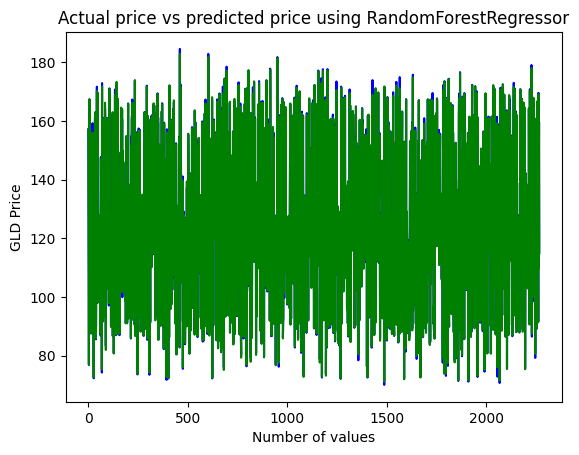

In [146]:
Y_train=list(Y_train) # converting Y_test into a list
# plotting graphs between the predicted value and the actual value ( this wil help in comparing )
plt.plot(Y_train,color='blue',label='Actual value')
plt.plot(train_data_prediction,color='green',label='Predicted value')
plt.title('Actual price vs predicted price using RandomForestRegressor')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend # the plot seems like this because of this statement
plt.show
#The fact that the blue and the green values are superimposed proves that the values are very close to each other .


<function matplotlib.pyplot.show(close=None, block=None)>

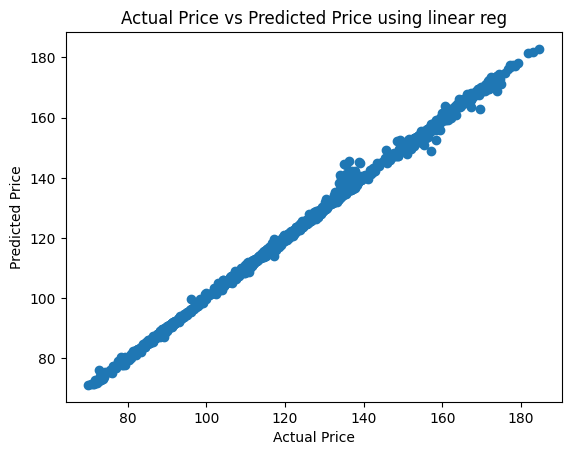

In [147]:
# plotting a graph now and you will be able to see that the plot follows x=y line , so it's pretty clear that the values are almost equal and hence the model works well .
plt.scatter(Y_train,train_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price using linear reg")
plt.show

Now we will generate values of GLD from the test set using the above machine learning aka linear regression model ....wohooooo


In [148]:
regressor_test = RandomForestRegressor(n_estimators=100)
# training the model using the train sets
regressor_test.fit(X_test,Y_test)
# prediction -
test_data_prediction = regressor_test.predict(X_test)
# predicted values of GLD using the X_train set is as shown as below -
print(test_data_prediction)

[164.41490211 100.61920192 111.92139983 125.2191981  120.88830154
 152.60230507 156.18330281 123.13040067 119.73709997 126.06009762
 116.64469801 168.0471967  144.58630324 166.94669862 116.61729867
 118.36569845 142.76399895 166.36969629 155.10369741 169.70349913
 152.79870127 128.61949623 170.3140003 ]


In [149]:
# comparing the predicted values with the actual values of the GLD
# we will use metrics in this and r^2 error
error=metrics.r2_score(Y_test,test_data_prediction)
print("R^2 error comes out to be:",error)
# here , you can see that the error is aroud .99 which is very less compared to the predicted values that are in 100's . So we can say that the model is working is pretty well .

R^2 error comes out to be: 0.9514178950846149


<function matplotlib.pyplot.show(close=None, block=None)>

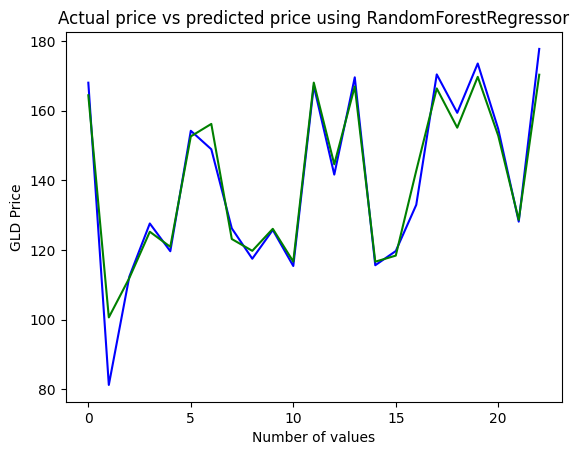

In [150]:
Y_test=list(Y_test) # converting Y_test into a list
# plotting graphs between the predicted value and the actual value ( this wil help in comparing )
plt.plot(Y_test,color='blue',label='Actual value')
plt.plot(test_data_prediction,color='green',label='Predicted value')
plt.title('Actual price vs predicted price using RandomForestRegressor')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend # the plot seems like this because of this statement
plt.show
#The fact that the blue and the green values are superimposed proves that the values are very close to each other .
#The graph looks like this since only 1% of the total dataset has been taken as a test dataset


<function matplotlib.pyplot.show(close=None, block=None)>

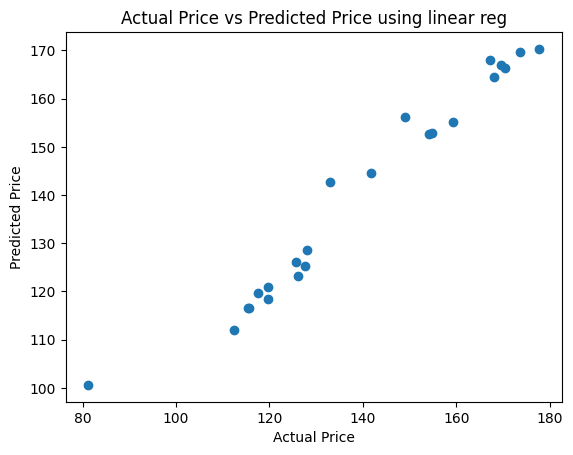

In [151]:
# plotting a graph now and you will be able to see that the plot follows x=y line , so it's pretty clear that the values are almost equal and hence the model works well .
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price using linear reg")
plt.show

HENCE , WE'VE COMPLETED THE GOLD PRICE PREDICTION AS WELL WITH LINEAR REGRESSION

BUT INSTEAD OF USING LINEARREGRESSION FROM SKLEARN , THIS TIME WE DID IT USING RandomForestRegressor MODULE FROM SKLEARN

RandomForestRegressor USES MULTIPLE DECISION TREES ( CAN BE USED IN GOOD CASES OF CLASSIFICATION )

THOUGH THE BEST WAY TO PERFORM LINEAR REGRESSION WOULD BE TO USE NUERAL NETWORKS .